## Traffic Sign Recognition Classifier


---
## Load the data

In [1]:
# Load pickled data
import pickle

training_file = './data/train.p'
validation_file = './data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Dataset Exploration & Summary

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


In [2]:
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape 

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
import matplotlib.pyplot as plt
import random
# Data exploration continued
%matplotlib inline

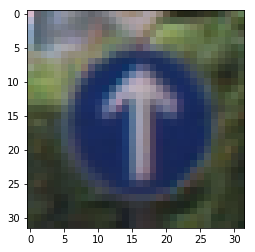

In [4]:
# Plots a single random traffic sign image
randomIndex = random.randint(0, n_train - 1)
plt.imshow(X_train[randomIndex])

Random Images


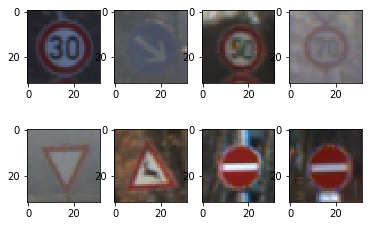

In [5]:
# Plots multiple random traffic sign images
print('Random Images')
numOfImagesToPlot = 8
for i in range(numOfImagesToPlot):
    randomIndex = random.randint(0, n_train - 1)
    plt.subplot(2, numOfImagesToPlot / 2, i + 1)
    plt.imshow(X_train[randomIndex])

[]

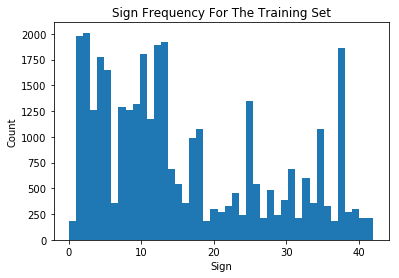

In [6]:
# Plots how many times each sign appears
plt.hist(y_train, bins=n_classes)
plt.title('Sign Frequency For The Training Set')
plt.xlabel('Sign')
plt.ylabel('Count')
plt.plot()

In [7]:
import csv

signNames = []
counts = np.bincount(y_train)

# Loads all the sign names into a list
with open('./signnames.csv', 'rt') as f:
    reader = csv.reader(f)
    for row in reader:
        signNames.append(row[1])
    # Gets rid of the csv header
    signNames.pop(0)

# counts and signNames should be of the same length
assert len(counts) == len(signNames)

print('---Count Results---')
for i in range(len(counts)):
    print(str(i) + '-'+ signNames[i] + ': ' + str(counts[i]))

---Count Results---
0-Speed limit (20km/h): 180
1-Speed limit (30km/h): 1980
2-Speed limit (50km/h): 2010
3-Speed limit (60km/h): 1260
4-Speed limit (70km/h): 1770
5-Speed limit (80km/h): 1650
6-End of speed limit (80km/h): 360
7-Speed limit (100km/h): 1290
8-Speed limit (120km/h): 1260
9-No passing: 1320
10-No passing for vehicles over 3.5 metric tons: 1800
11-Right-of-way at the next intersection: 1170
12-Priority road: 1890
13-Yield: 1920
14-Stop: 690
15-No vehicles: 540
16-Vehicles over 3.5 metric tons prohibited: 360
17-No entry: 990
18-General caution: 1080
19-Dangerous curve to the left: 180
20-Dangerous curve to the right: 300
21-Double curve: 270
22-Bumpy road: 330
23-Slippery road: 450
24-Road narrows on the right: 240
25-Road work: 1350
26-Traffic signals: 540
27-Pedestrians: 210
28-Children crossing: 480
29-Bicycles crossing: 240
30-Beware of ice/snow: 390
31-Wild animals crossing: 690
32-End of all speed and passing limits: 210
33-Turn right ahead: 599
34-Turn left ahead: 

----

## Design and Test a Model Architecture

The model's purpose is to recognize German traffic signs. The model will be trained and tested on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).The model is based on the LeNet-5 model.


###  Data Set Pre-processing (normalization, grayscale, etc.)

In [8]:
# Data preprocessing
from sklearn.utils import shuffle
# Shuffles the data
X_train, y_train = shuffle(X_train, y_train)
# Makes copies of the original images
X_train_copy = np.copy(X_train)
X_test_copy = np.copy(X_test)
# Zero center the data and normalize
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

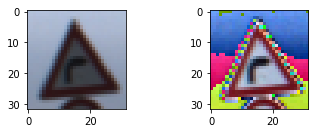

In [10]:
# Plot to see the results of preprocessing
randomIndex = random.randint(0, n_train - 1)
plt.subplot(221)
plt.imshow(X_train_copy[randomIndex])
plt.subplot(222)
plt.imshow(X_train[randomIndex])

### Model Architecture

In [11]:
import tensorflow as tf
# EPOCH and BATCH_SIZE values affect the training speed and model accuracy
EPOCHS = 20
BATCH_SIZE = 256

In [12]:
from tensorflow.contrib.layers import flatten

def neural_network(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Layer 1 activation
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Layer 2 activation
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Layer 3 activation
    fc1    = tf.nn.relu(fc1)
    
    # Layer 3 dropout, helps with overfitting
    fc1    = tf.nn.dropout(fc1, dropout_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Layer 4 activation
    fc2    = tf.nn.relu(fc2)
    
    # Layer 4 dropout, helps with overfitting
    fc2    = tf.nn.dropout(fc2, dropout_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    # 43 is the number of classes
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [13]:
#x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
dropout_prob = tf.placeholder(tf.float32)

In [14]:
rate = 0.0025

logits = neural_network(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
print(cross_entropy)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Tensor("Reshape_2:0", shape=(?,), dtype=float32)


In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dropout_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout_prob: 0.75})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'traffic')
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.792

EPOCH 2 ...
Validation Accuracy = 0.851

EPOCH 3 ...
Validation Accuracy = 0.890

EPOCH 4 ...
Validation Accuracy = 0.911

EPOCH 5 ...
Validation Accuracy = 0.919

EPOCH 6 ...
Validation Accuracy = 0.916

EPOCH 7 ...
Validation Accuracy = 0.910

EPOCH 8 ...
Validation Accuracy = 0.940

EPOCH 9 ...
Validation Accuracy = 0.942

EPOCH 10 ...
Validation Accuracy = 0.922

EPOCH 11 ...
Validation Accuracy = 0.926

EPOCH 12 ...
Validation Accuracy = 0.911

EPOCH 13 ...
Validation Accuracy = 0.934

EPOCH 14 ...
Validation Accuracy = 0.919

EPOCH 15 ...
Validation Accuracy = 0.943

EPOCH 16 ...
Validation Accuracy = 0.940

EPOCH 17 ...
Validation Accuracy = 0.936

EPOCH 18 ...
Validation Accuracy = 0.902

EPOCH 19 ...
Validation Accuracy = 0.937

EPOCH 20 ...
Validation Accuracy = 0.941

Model saved


In [17]:
# Training Accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))

Train Accuracy = 0.999


In [18]:
# Validation Accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    valid_accuracy = evaluate(X_valid, y_valid)
    print("Valid Accuracy = {:.3f}".format(valid_accuracy))

Valid Accuracy = 0.941


In [19]:
# Test Accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.947


---

## Model Testing on New Images

### Load and Output the Images

In [20]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import scipy

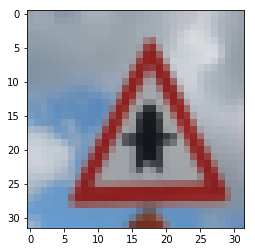

In [21]:
# Right-of-way at the next intersection
img_1 = scipy.misc.imread('./new_images/img-1.jpg')
img_1 = scipy.misc.imresize(img_1, (32, 32))
plt.imshow(img_1)

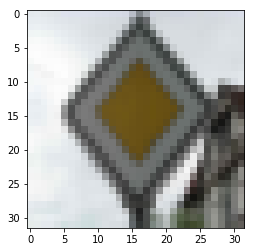

In [22]:
# Priority road
img_2 = scipy.misc.imread('./new_images/img-2.jpg')
img_2 = scipy.misc.imresize(img_2, (32, 32))
plt.imshow(img_2)

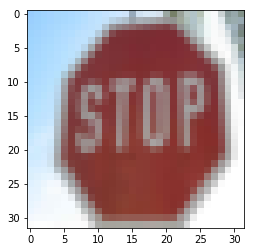

In [23]:
# Stop
img_3 = scipy.misc.imread('./new_images/img-3.jpg')
img_3 = scipy.misc.imresize(img_3, (32, 32))
plt.imshow(img_3)

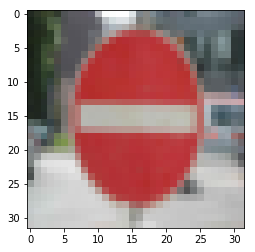

In [24]:
# No entry
img_4 = scipy.misc.imread('./new_images/img-4.jpg')
img_4 = scipy.misc.imresize(img_4, (32, 32))
plt.imshow(img_4)

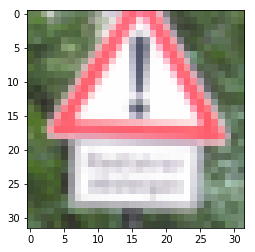

In [25]:
# General caution
img_5 = scipy.misc.imread('./new_images/img-5.jpg')
img_5 = scipy.misc.imresize(img_5, (32, 32))
plt.imshow(img_5)

### Predict the Sign Type for Each Image

In [26]:
# Zero center the data and normalize
img_1 = (img_1 - mean) / std
img_2 = (img_2 - mean) / std
img_3 = (img_3 - mean) / std
img_4 = (img_4 - mean) / std
img_5 = (img_5 - mean) / std

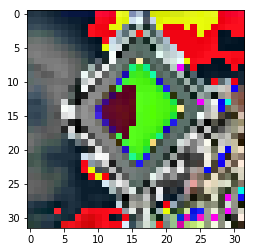

In [27]:
plt.imshow(img_2)

In [28]:
new_images = []
new_images.append(img_1)
new_images.append(img_2)
new_images.append(img_3)
new_images.append(img_4)
new_images.append(img_5)

In [29]:
new_images = np.array(new_images)

### Performance

In [30]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(logits, feed_dict={x: new_images, dropout_prob : 1.0})
    for i in range(len(predictions)):
        imgNum = i + 1
        predIndex = predictions[i].argmax()
        print('img-' + str(imgNum) + ' prediction: ' + str(signNames[predIndex]))

img-1 prediction: Right-of-way at the next intersection
img-2 prediction: Priority road
img-3 prediction: Stop
img-4 prediction: No entry
img-5 prediction: No passing


### Softmax Probabilities For Additional Images

In [33]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(logits, feed_dict={x: new_images, dropout_prob : 1.0})
    softmax = sess.run(tf.nn.top_k(predictions, k=5, sorted=True))
    for i in range(len(predictions)):
        imgNum = i + 1
        print('-----'+ 'img-' + str(imgNum) +'-----')
        for j in range(len(softmax[0][0])):
            predIndex = softmax[1][i][j]
            probability = softmax[0][i][j]
            print('  ' + signNames[predIndex] + ': ' + str(probability))
    

-----img-1-----
  Right-of-way at the next intersection: 35.3474
  Beware of ice/snow: 11.365
  Slippery road: 5.40584
  Pedestrians: 4.13461
  Dangerous curve to the left: 1.46008
-----img-2-----
  Priority road: 59.6481
  Ahead only: 7.35633
  End of no passing: 7.0554
  End of no passing by vehicles over 3.5 metric tons: 5.01752
  Traffic signals: 4.46594
-----img-3-----
  Stop: 17.8213
  Road work: 6.53553
  Yield: 5.91481
  No passing for vehicles over 3.5 metric tons: 2.30893
  No vehicles: 2.28988
-----img-4-----
  No entry: 60.1008
  Stop: 20.1907
  Bicycles crossing: 5.53249
  Speed limit (20km/h): 3.0367
  Priority road: -2.5897
-----img-5-----
  No passing: 19.3896
  No passing for vehicles over 3.5 metric tons: 6.76581
  Ahead only: 4.05825
  Vehicles over 3.5 metric tons prohibited: 3.1163
  End of no passing: 2.81353
